In [1]:
import pandas as pd
import numpy as np
import torch
from visualization import plot_curve

In [2]:
data = pd.read_excel(r'model_data\东华\data.xlsx', sheet_name='select', header=0)

In [256]:
nox = data["#1炉SCR反应器A脱硝前烟气NOx含量"]
co = data["A侧CO"]
etem = data["空预器A出口烟气温度4"]
rtem = data["再热蒸汽温度（左）"]
o2 = data["预热器前烟道左侧氧量2"]
load = data["#1机组负荷"]

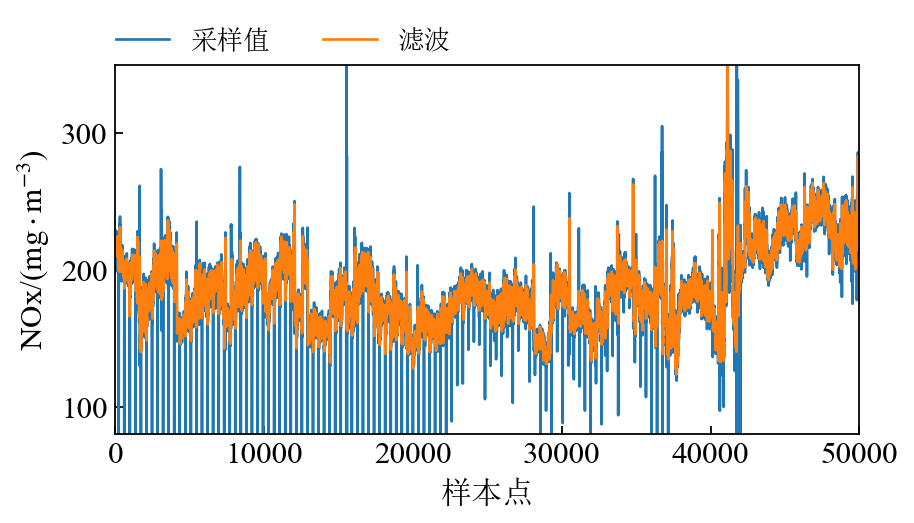

In [216]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
config = {
    "font.family": "times new roman",
    "font.size": 14,
    "mathtext.fontset": "stix",
    "xtick.direction": "in",
    "ytick.direction": "in",
}
rcParams.update(config)
color_list = plt.cm.tab10(np.linspace(0, 1, 12))
linesyle_list = ['-', '-', '--', ':']


'''
定义画图可视化模版
'''
def plot_curve(data: dict):
    fig, ax = plt.subplots(1, 1, figsize=(6, 3), dpi=160)
    for i in range(len(data["x"])):
        ax.plot(data["x"][i],
                data["y"][i],
                color=color_list[i+1],
                linestyle=linesyle_list[i],
                linewidth=1.2)

    if data.get("ylim"):
        ax.set_ylim(data["ylim"])
    else:
        ax.set_ylim([np.percentile(data["y"][i], 0.5), np.percentile(data["y"][i], 99.5)])
    if data.get("xlim"):
        ax.set_xlim(data["xlim"])
    if data.get("xlabel"):
        ax.set_xlabel(data["xlabel"], {"family":"SimSun"})
    if data.get("ylabel"):
        ax.set_ylabel(data["ylabel"], {"family":"times new roman"})
    if data.get("xticks"):
        ax.set_xticks(data["xticks"])
    if data.get("legend"):
        legend_font = {"family": "SimSun", "size": 12}
        fig.legend(data["legend"], frameon=False, bbox_to_anchor=(0.5, 1.01), ncol=2, prop=legend_font)
    plt.show()

curve_data = {
    "x": [np.arange(len(nox))],
    "y": [nox],
    "ylim": [40, 600],
    "xlim": [0, 50000],
    "xlabel": "样本点",
    "ylabel": "NOx/($\mathrm{mg \cdot m^{-3}}$)"
}

from filter import *
nox_data_valider = DataValid(min_value=80, max_value=500, step_limit=20, step_value=2)
nox_data_filter = MedianFilter(kernel_size=5)

nox_valid = nox_data_valider.apply(np.array(nox))
nox_filter = nox_data_filter.apply(nox_valid)

curve_data = {
    "x": [np.arange(len(nox_filter)), np.arange(len(nox_filter))],
    "y": [nox, nox_filter],
    "ylim": [80, 350],
    "xlim": [0, 50000],
    "xlabel": "样本点",
    "ylabel": "NOx/($\mathrm{mg \cdot m^{-3}}$)",
    "legend": ["采样值", "滤波"],
}
plot_curve(curve_data)

### deal with NOx

In [239]:
def print_distribution(data, points=[0.1,1,2,3,97,98,99,99.9]):
    for point in points:
        print(f"分位数{point}:",np.percentile(data, point))
    data_inc = (np.roll(data, -1) - data)[:-1]
    for point in points:
        print(f"增量分位数{point}:",np.percentile(data_inc, point))

print_distribution(np.array(etem), points=[0.5,1,2,3,95,97,98,99,99.5])                   

分位数0.5: 117.583778
分位数1: 117.896729
分位数2: 118.209747
分位数3: 118.701744
分位数95: 154.296143
分位数97: 155.070648
分位数98: 155.480759
分位数99: 156.711472
分位数99.5: 157.395416
增量分位数0.5: -0.22758399999997891
增量分位数1: -0.2250213199999979
增量分位数2: -0.18136599999999703
增量分位数3: -0.1796640000000025
增量分位数95: 0.13594100000000253
增量分位数97: 0.17874148000000273
增量分位数98: 0.18080100000000243
增量分位数99: 0.2238161600000018
增量分位数99.5: 0.22746315000000014


### deal with CO

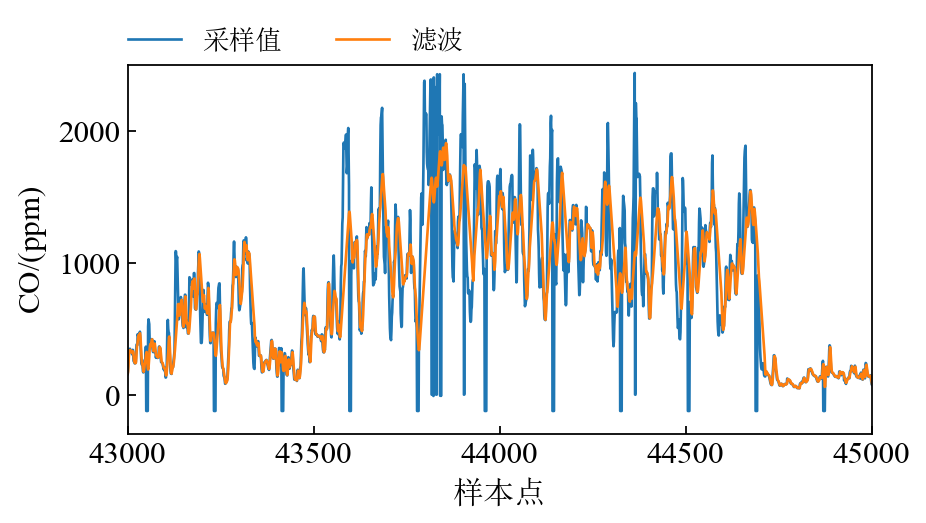

In [181]:
co_data_valider = DataValid(min_value=20, max_value=2000, step_limit=150, step_value=40)
co_data_filter = MedianFilter(kernel_size=3)
co_valid = co_data_valider.apply(np.array(co))
co_filter = co_data_filter.apply(co_valid)
curve_data = {
    "x": [np.arange(len(nox_filter)), np.arange(len(nox_filter))],
    "y": [co, co_filter],
    "ylim": [-300, 2500],
    "xlim": [43000, 45000],
    "xlabel": "样本点",
    "ylabel": "CO/($\mathrm{ppm}$)",
    "legend": ["采样值", "滤波"],
}
plot_curve(curve_data)

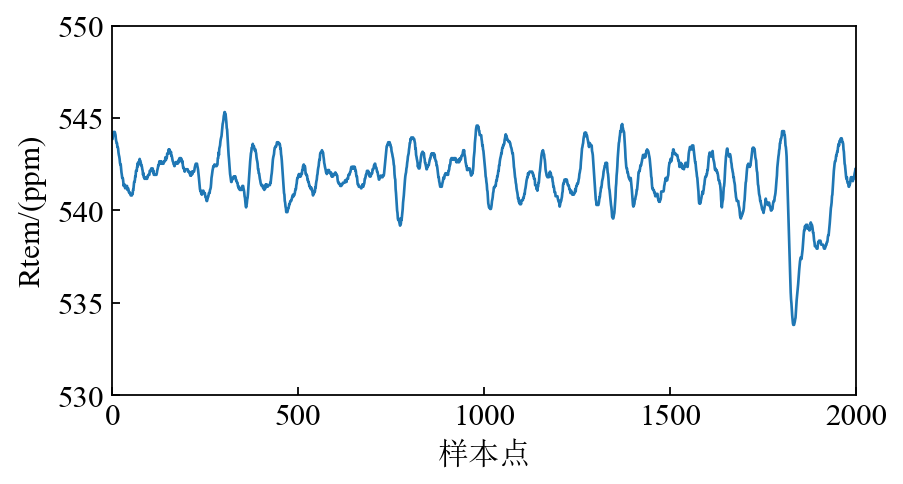

In [236]:
curve_data = {
    "x": [np.arange(len(nox_filter))],
    "y": [rtem],
    "ylim": [530, 550],
    "xlim": [0, 2000],
    "xlabel": "样本点",
    "ylabel": "Rtem/($\mathrm{ppm}$)",
    # "legend": ["采样值", "滤波"],
}
plot_curve(curve_data)

### load

分位数0.1: 112.458762733
分位数1: 127.49541642
分位数2: 147.90791683999998
分位数3: 169.44690908
分位数95: 302.8639393
分位数97: 306.29857517
分位数98: 307.6682923
分位数99: 310.53107049
分位数99.5: 311.023349815
增量分位数0.1: -2.510971092000012
增量分位数1: -1.5192339200000027
增量分位数2: -1.2666393200000152
增量分位数3: -1.0891549800000024
增量分位数95: 0.893286099999949
增量分位数97: 1.1365068199999893
增量分位数98: 1.3158547200000152
增量分位数99: 1.6041570000000156
增量分位数99.5: 1.8742799000000314


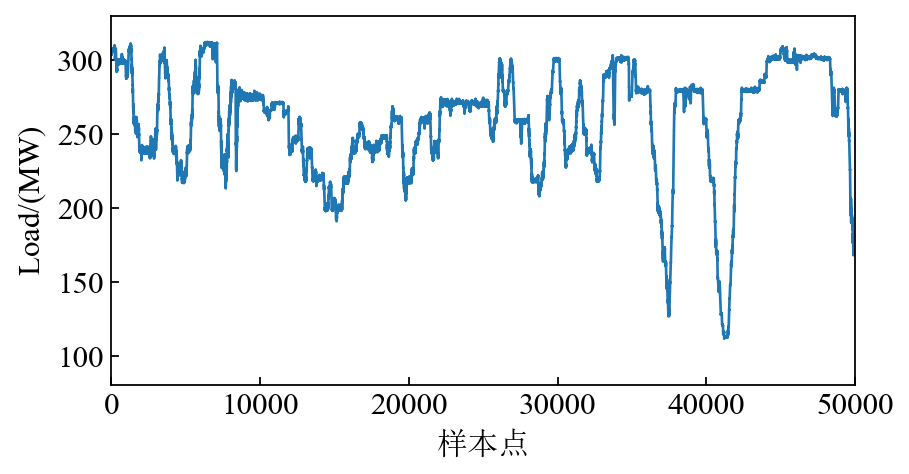

In [200]:
print_distribution(np.array(load), points=[0.1,1,2,3,95,97,98,99,99.5])    

curve_data = {
    "x": [np.arange(len(nox_filter))],
    "y": [load],
    "ylim": [80, 330],
    "xlim": [0, 50000],
    "xlabel": "样本点",
    "ylabel": "Load/($\mathrm{MW}$)",
    # "legend": ["采样值", "滤波"],
}
plot_curve(curve_data)

### 锅炉热效率计算

In [258]:
# 折合飞灰含碳量
cfh = co_filter*0.002016+0.15967741

def CalculateThermalEfficiency(CO, Cfh, O2, Etem, INtem):
    Mar = 7.6/100  # 收到基水分 Mt
    Mad = 2.58/100  # 空气干燥基水分 Mad
    Aar = 27.16/100  # 收到基灰分 Aar
    Qnet=20.9*1000  # 低位发热量 Qnet
    Xar2ad=(1-Mar)/(1-Mad)  # 收到基-空气干燥基转换系数
    c = Xar2ad*49.35/100
    h = Xar2ad*3.20/100
    n = Xar2ad*0.90/100
    s = Xar2ad*0.78/100
    o = 1-c-h-n-s-Mar-Aar
    ALPHA=21/(21-O2)  # 过量空气系数
    Vgk0=100*(0.089*(c+0.375*s)+0.265*h-0.0333*o)  # 理论干空气量 m^3 
    Vgy0=1.866*(c+0.375*s)+0.79*Vgk0+0.8*n  # 理论干烟气量
    Vgy=Vgy0+(ALPHA-1)*Vgk0  # 每千克燃料生成的干烟气量
    Cpy=0.8967+0.0013*(Etem)-0.000003*(Etem)*(Etem)   # 干烟气平均定压比热容 kJ/ (kg·K)
    Q2gy = Vgy*Cpy*(Etem-INtem)/Qnet  # 干烟气热损失
    V_H2O = 1.24*((9*h+Mar)+1.293*ALPHA*Vgk0*0.001)  # 烟气中水蒸气的体积
    Q_H2O = V_H2O*1.5093*(Etem-INtem)  # 干烟气热损失中水蒸气显热
    Q2H2O = Q_H2O/Qnet  # 水分热损失
    Q3 = Vgy*126.36*CO*10e-6*100/Qnet
    Q4 = 33730*Aar/Qnet*Cfh/(100-Cfh) # 飞灰含碳热损失
    Q5 = 0.035
    eff = 1 - Q2H2O - Q2gy - Q3 - Q4 - Q5# 锅炉效率 
    return eff

eff = CalculateThermalEfficiency(co_filter, cfh, o2, etem, 20)

分位数0.1: 0.8615538135862835
分位数1: 0.87659537498793
分位数2: 0.8855119002148791
分位数3: 0.8920954333710968
分位数97: 0.9353197841969029
分位数98: 0.9355722510463313
分位数99: 0.9357959701317057
分位数99.9: 0.936214033513812
增量分位数0.1: -0.0036820314211742557
增量分位数1: -0.0024280068995462356
增量分位数2: -0.001953234223549689
增量分位数3: -0.0017075474561058957
增量分位数97: 0.00166761148489456
增量分位数98: 0.0018971854845435318
增量分位数99: 0.002371025146780858
增量分位数99.9: 0.003716633822221649


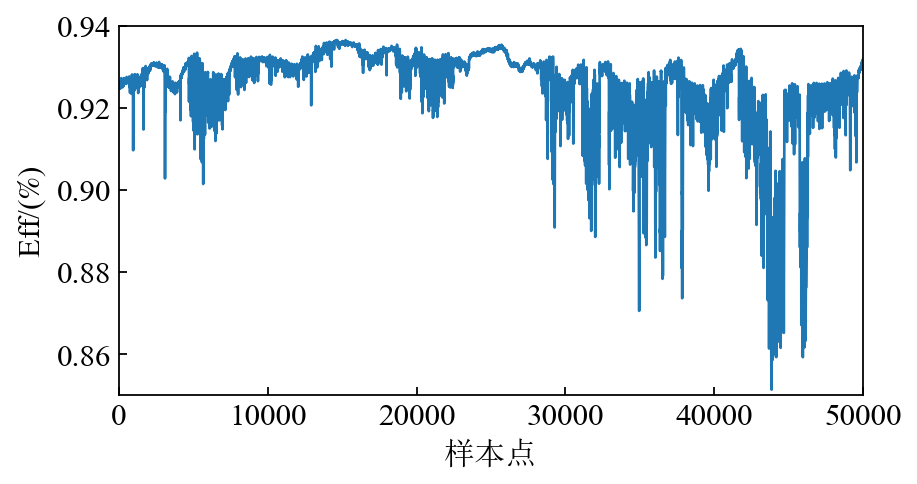

In [272]:
print_distribution(eff)
curve_data = {
    "x": [np.arange(len(nox_filter))],
    "y": [eff],
    "ylim": [0.85, 0.94],
    "xlim": [0, 50000],
    "xlabel": "样本点",
    "ylabel": "Eff/($\mathrm{\%}$)",
    # "legend": ["采样值", "滤波"],
}
plot_curve(curve_data)

In [280]:
min_index = np.argmax(eff)
print(load[min_index])
print(co_filter[min_index])
print(etem[min_index])

207.770096
27.499275
116.868652


### save_data

In [263]:
def dataFrameAppend(data: pd.DataFrame, columns:dict, file_name: str):
    for key,value in columns.items():
        data[key] = value
    data.to_excel(file_name, index=False)
    
new_columns = {
    "nox_filter": nox_filter,
    "co_filter": co_filter,
    "eff": eff,
}
dataFrameAppend(data, new_columns, file_name="model_data\东华\data_preprocessed.xlsx")